# Data Preparation - LMA Features Data

## Imports

In [184]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import joblib
from collections import Counter
import numpy as np

### Load Dataset

In [165]:
data = pd.read_csv('datasets/pad/DANCE_WALK.csv')

In [166]:
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A,EMOTION_D
0,1.405579,0.752794,0.769539,0.375881,0.699384,0.706285,0.564900,0.571047,0.286151,0.278570,...,-0.004365,0.000981,0.000964,0.000084,0.076525,0.598490,0.000038,-0.5,0.6,0.9
1,1.405016,0.752285,0.768338,0.376322,0.699275,0.705782,0.564679,0.570562,0.286151,0.278580,...,-0.006680,-0.001493,-0.001258,-0.003487,0.076450,0.597914,0.000051,-0.5,0.6,0.9
2,1.405531,0.751649,0.770536,0.376244,0.698988,0.706642,0.564438,0.571611,0.286151,0.278603,...,0.001205,0.002248,0.009346,0.001204,0.076554,0.598737,0.000077,-0.5,0.6,0.9
3,1.404996,0.749954,0.771848,0.377361,0.698365,0.706787,0.563786,0.571794,0.286151,0.278632,...,-0.007223,0.002583,0.002250,-0.005244,0.076514,0.598354,0.000076,-0.5,0.6,0.9
4,1.406907,0.750360,0.775442,0.376559,0.698596,0.708461,0.564110,0.573280,0.286151,0.278669,...,-0.008956,0.003408,-0.011534,-0.015876,0.076660,0.599520,0.000077,-0.5,0.6,0.9


## Feature Selection

In [167]:
data = pd.read_csv('datasets/pad/DANCE_WALK.csv')

In [168]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled
0,1.405579,0.752794,0.769539,0.375881,0.699384,0.706285,0.564900,0.571047,0.286151,0.278570,...,-0.002192,0.004540,0.005694,-0.004365,0.000981,0.000964,0.000084,0.076525,0.598490,0.000038
1,1.405016,0.752285,0.768338,0.376322,0.699275,0.705782,0.564679,0.570562,0.286151,0.278580,...,0.003267,-0.002469,-0.003685,-0.006680,-0.001493,-0.001258,-0.003487,0.076450,0.597914,0.000051
2,1.405531,0.751649,0.770536,0.376244,0.698988,0.706642,0.564438,0.571611,0.286151,0.278603,...,0.003954,0.003332,0.016692,0.001205,0.002248,0.009346,0.001204,0.076554,0.598737,0.000077
3,1.404996,0.749954,0.771848,0.377361,0.698365,0.706787,0.563786,0.571794,0.286151,0.278632,...,0.001754,0.004711,0.007814,-0.007223,0.002583,0.002250,-0.005244,0.076514,0.598354,0.000076
4,1.406907,0.750360,0.775442,0.376559,0.698596,0.708461,0.564110,0.573280,0.286151,0.278669,...,-0.000286,0.000521,-0.006896,-0.008956,0.003408,-0.011534,-0.015876,0.076660,0.599520,0.000077


### Variance Analysis

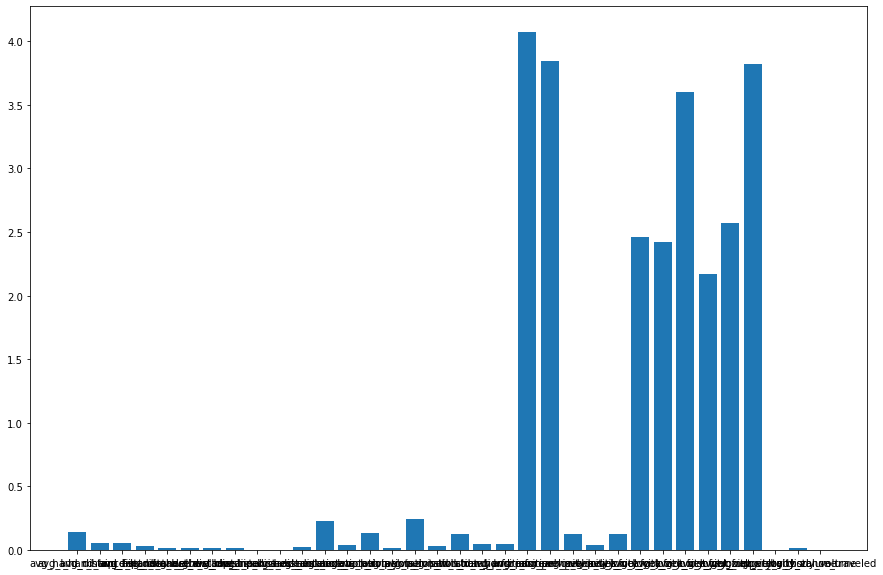

avg_hand_distance  -  0.14213320093071263
avg_l_hand_hip_distance  -  0.05307745370460348
avg_r_hand_hip_distance  -  0.0515652748782161
avg_feet_distance  -  0.032942198117267785
avg_l_hand_chest_distance  -  0.01823512795834131
avg_r_hand_chest_distance  -  0.01829263928445178
avg_l_elbow_hip_distance  -  0.01277346359929562
avg_r_elbow_hip_distance  -  0.012324989730987097
avg_chest_pelvis_distance  -  1.234305423792847e-18
avg_neck_chest_distance  -  2.487735010089904e-05
avg_neck_rotation_w  -  0.024626210528715994
avg_neck_rotation_x  -  0.22703630361809035
avg_neck_rotation_y  -  0.03786492179592007
avg_neck_rotation_z  -  0.13191849287387827
avg_pelvis_rotation_w  -  0.01690116893166194
avg_pelvis_rotation_x  -  0.2406917033876242
avg_pelvis_rotation_y  -  0.027743282389898084
avg_pelvis_rotation_z  -  0.12572761390679651
std_l_hand_position  -  0.047247004984195075
std_r_hand_position  -  0.043770215728005525
avg_l_forearm_velocity  -  4.072072788826088
avg_r_forearm_velocity 

In [169]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

### Remove highly correlated features

In [170]:
data = pd.read_csv('datasets/pad/DANCE_WALK.csv')

In [171]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled
0,1.405579,0.752794,0.769539,0.375881,0.699384,0.706285,0.564900,0.571047,0.286151,0.278570,...,-0.002192,0.004540,0.005694,-0.004365,0.000981,0.000964,0.000084,0.076525,0.598490,0.000038
1,1.405016,0.752285,0.768338,0.376322,0.699275,0.705782,0.564679,0.570562,0.286151,0.278580,...,0.003267,-0.002469,-0.003685,-0.006680,-0.001493,-0.001258,-0.003487,0.076450,0.597914,0.000051
2,1.405531,0.751649,0.770536,0.376244,0.698988,0.706642,0.564438,0.571611,0.286151,0.278603,...,0.003954,0.003332,0.016692,0.001205,0.002248,0.009346,0.001204,0.076554,0.598737,0.000077
3,1.404996,0.749954,0.771848,0.377361,0.698365,0.706787,0.563786,0.571794,0.286151,0.278632,...,0.001754,0.004711,0.007814,-0.007223,0.002583,0.002250,-0.005244,0.076514,0.598354,0.000076
4,1.406907,0.750360,0.775442,0.376559,0.698596,0.708461,0.564110,0.573280,0.286151,0.278669,...,-0.000286,0.000521,-0.006896,-0.008956,0.003408,-0.011534,-0.015876,0.076660,0.599520,0.000077


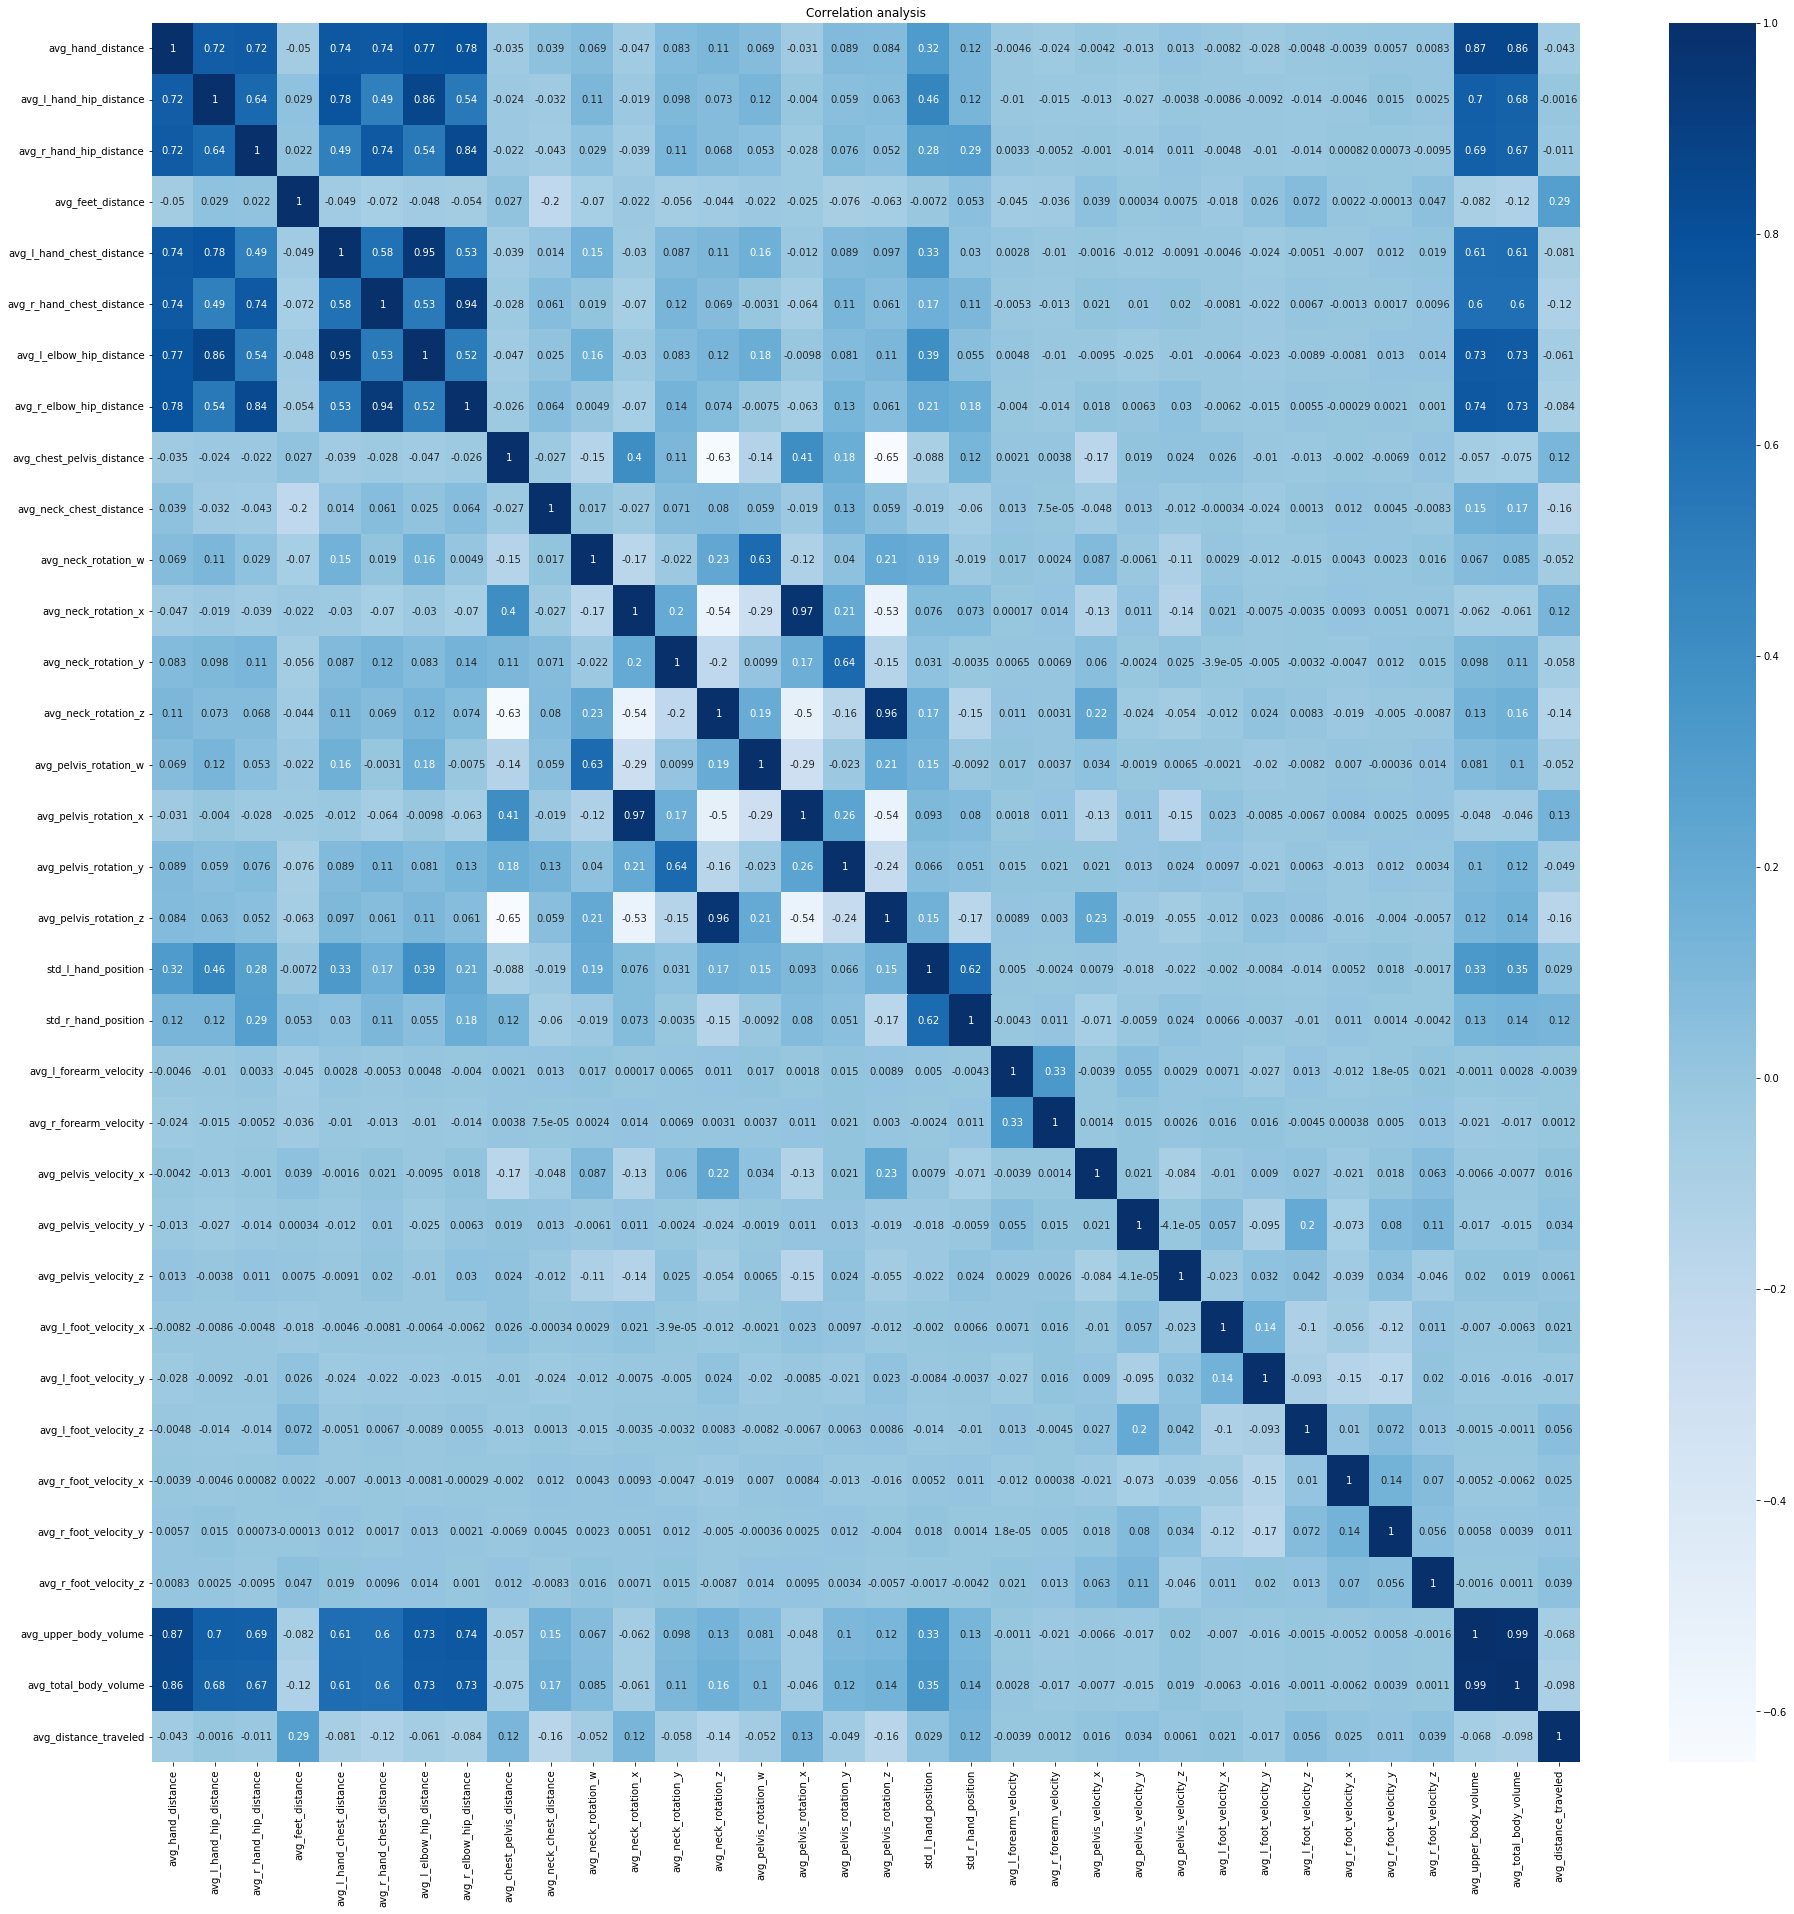

In [172]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [173]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['avg_l_elbow_hip_distance', 'avg_pelvis_rotation_x', 'avg_pelvis_rotation_z', 'avg_total_body_volume']


In [174]:
X = X.drop(columns=['avg_total_body_volume'])
#X = X.drop(columns=['avg_total_body_volume', 'avg_feet_distance', 'avg_pelvis_rotation_x', 'avg_pelvis_rotation_y', 'avg_pelvis_rotation_z', 'avg_pelvis_rotation_w', 'avg_l_foot_velocity_x', 'avg_l_foot_velocity_y', 'avg_l_foot_velocity_z', 'avg_r_foot_velocity_x', 'avg_r_foot_velocity_y', 'avg_r_foot_velocity_z', 'avg_distance_traveled'])

In [175]:
#Store

fullData = X.join(y, how='right')
fullData.to_csv(r'datasets/pad/Fs_DANCE_WALK.csv', index = False)

In [176]:
data = pd.read_csv('datasets/pad/Fs_DANCE_WALK.csv')

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A,EMOTION_D
0,1.405579,0.752794,0.769539,0.375881,0.699384,0.706285,0.564900,0.571047,0.286151,0.278570,...,0.005694,-0.004365,0.000981,0.000964,0.000084,0.076525,0.000038,-0.5,0.6,0.9
1,1.405016,0.752285,0.768338,0.376322,0.699275,0.705782,0.564679,0.570562,0.286151,0.278580,...,-0.003685,-0.006680,-0.001493,-0.001258,-0.003487,0.076450,0.000051,-0.5,0.6,0.9
2,1.405531,0.751649,0.770536,0.376244,0.698988,0.706642,0.564438,0.571611,0.286151,0.278603,...,0.016692,0.001205,0.002248,0.009346,0.001204,0.076554,0.000077,-0.5,0.6,0.9
3,1.404996,0.749954,0.771848,0.377361,0.698365,0.706787,0.563786,0.571794,0.286151,0.278632,...,0.007814,-0.007223,0.002583,0.002250,-0.005244,0.076514,0.000076,-0.5,0.6,0.9
4,1.406907,0.750360,0.775442,0.376559,0.698596,0.708461,0.564110,0.573280,0.286151,0.278669,...,-0.006896,-0.008956,0.003408,-0.011534,-0.015876,0.076660,0.000077,-0.5,0.6,0.9


## Data Balancing

In [143]:
data = pd.read_csv('datasets/label/DANCE_WALK_DATA.csv')
#data = pd.read_csv('datasets/label/LMA_DATA_EXTRA.csv')
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled,EMOTION
0,1.405579,0.752794,0.769539,0.375881,0.699384,0.706285,0.564900,0.571047,0.286151,0.278570,...,0.004540,0.005694,-0.004365,0.000981,0.000964,0.000084,0.076525,0.598490,0.000038,angry
1,1.405016,0.752285,0.768338,0.376322,0.699275,0.705782,0.564679,0.570562,0.286151,0.278580,...,-0.002469,-0.003685,-0.006680,-0.001493,-0.001258,-0.003487,0.076450,0.597914,0.000051,angry
2,1.405531,0.751649,0.770536,0.376244,0.698988,0.706642,0.564438,0.571611,0.286151,0.278603,...,0.003332,0.016692,0.001205,0.002248,0.009346,0.001204,0.076554,0.598737,0.000077,angry
3,1.404996,0.749954,0.771848,0.377361,0.698365,0.706787,0.563786,0.571794,0.286151,0.278632,...,0.004711,0.007814,-0.007223,0.002583,0.002250,-0.005244,0.076514,0.598354,0.000076,angry
4,1.406907,0.750360,0.775442,0.376559,0.698596,0.708461,0.564110,0.573280,0.286151,0.278669,...,0.000521,-0.006896,-0.008956,0.003408,-0.011534,-0.015876,0.076660,0.599520,0.000077,angry


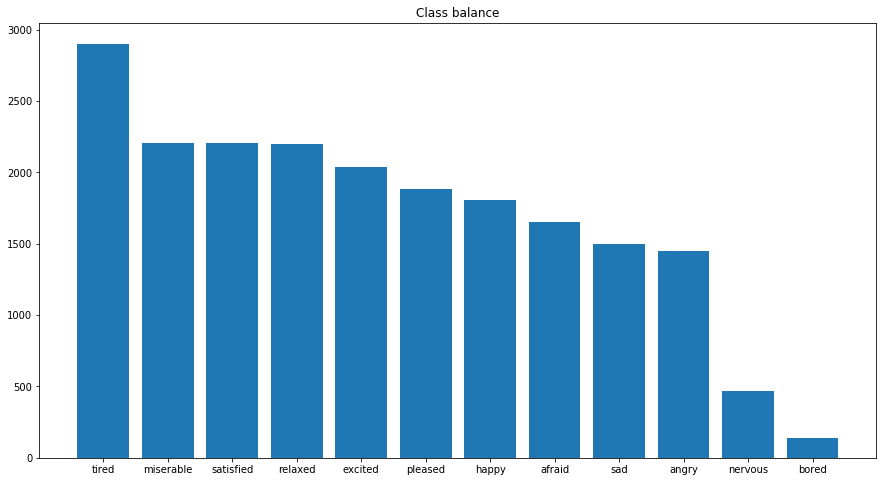

Minority class: 142
Majority class: 2209
Proportion: 0.06 : 1.0


In [144]:
target_count = data['EMOTION'].value_counts()

plt.figure(figsize=(15,8))
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

Class=angry, n=1446 (7.069%)
Class=pleased, n=1881 (9.196%)
Class=afraid, n=1653 (8.081%)
Class=bored, n=142 (0.694%)
Class=tired, n=2903 (14.192%)
Class=relaxed, n=2199 (10.750%)
Class=happy, n=1805 (8.824%)
Class=excited, n=2038 (9.963%)
Class=sad, n=1502 (7.343%)
Class=miserable, n=2209 (10.799%)
Class=satisfied, n=2209 (10.799%)
Class=nervous, n=468 (2.288%)


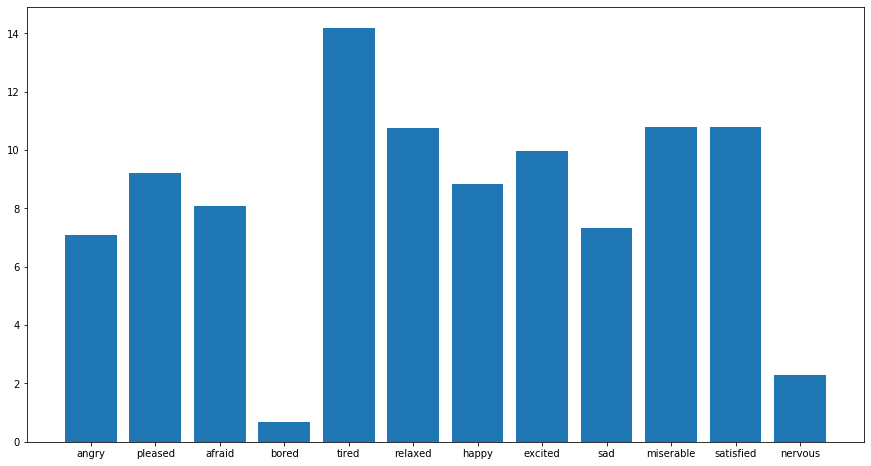

In [145]:
data = pd.read_csv('datasets/label/DANCE_WALK_DATA.csv')


values = data.values
# split into input and output elements
X, y = values[:, :-1], values[:, -1]

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), perc)
plt.show()

### Undersample

Class=afraid, n=1000 (4.889%)
Class=angry, n=1000 (4.889%)
Class=bored, n=142 (0.694%)
Class=excited, n=1000 (4.889%)
Class=happy, n=1000 (4.889%)
Class=miserable, n=1000 (4.889%)
Class=nervous, n=468 (2.288%)
Class=pleased, n=1000 (4.889%)
Class=relaxed, n=1000 (4.889%)
Class=sad, n=1000 (4.889%)
Class=satisfied, n=1000 (4.889%)
Class=tired, n=1000 (4.889%)


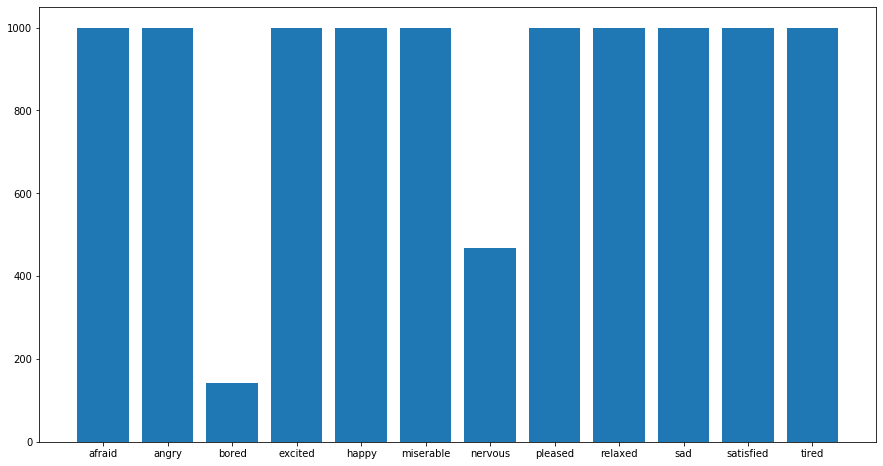

In [147]:
strategy = {"angry":1000, "happy": 1000, "sad": 1000, "afraid": 1000, "pleased": 1000, "bored": 142, "tired": 1000, "relaxed": 1000, "excited": 1000, "miserable": 1000, "satisfied": 1000, "nervous": 468}
#strategy = {"angry":1000, "happy": 1000, "sad": 1000, "disgusted": 1000, "afraid": 1000, "pleased": 1000, "bored": 142, "tired": 1000, "relaxed": 1000, "excited": 1000, "miserable": 1000, "satisfied": 1000, "nervous": 468}


nm = NearMiss(sampling_strategy=strategy)
X_res, y_res = nm.fit_resample(X, y)

# summarize distribution
counter = Counter(y_res)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### SMOTE

Class=afraid, n=1000 (8.333%)
Class=angry, n=1000 (8.333%)
Class=bored, n=1000 (8.333%)
Class=excited, n=1000 (8.333%)
Class=happy, n=1000 (8.333%)
Class=miserable, n=1000 (8.333%)
Class=nervous, n=1000 (8.333%)
Class=pleased, n=1000 (8.333%)
Class=relaxed, n=1000 (8.333%)
Class=sad, n=1000 (8.333%)
Class=satisfied, n=1000 (8.333%)
Class=tired, n=1000 (8.333%)


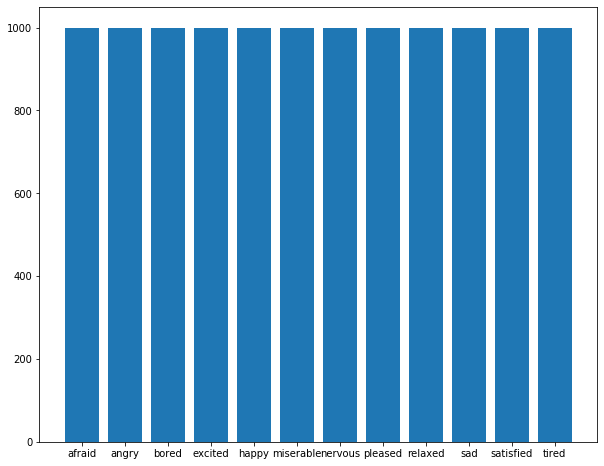

In [148]:
strategy = {"angry":1000, "happy": 1000, "sad": 1000, "afraid": 1000, "pleased": 1000, "bored": 1000, "tired": 1000, "relaxed": 1000, "excited": 1000, "miserable": 1000, "satisfied": 1000, "nervous": 1000}
#strategy = {"angry":1000, "happy": 1000, "sad": 1000, "disgusted": 1000, "afraid": 1000, "pleased": 1000, "bored": 1000, "tired": 1000, "relaxed": 1000, "excited": 1000, "miserable": 1000, "satisfied": 1000, "nervous": 1000}


# transform the dataset
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X_res, y_res)

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### Store data

In [149]:
conv_dict = {
    "angry": (-0.5, 0.6, 0.9),
    "happy": (0.6, 0.5, 0.2),
    "sad": (-0.6, -0.3, -0.3),
    "disgusted": (-0.4, 0.25, -0.1) ,
    "afraid": (-0.35, 0.7, -0.8),
    "pleased": (0.7, 0.2, 0.2),
    "bored": (-0.5, -0.7, -0.25),
    "tired": (0.1, -0.7, -0.2),
    "relaxed": (0.6, -0.55, 0.1),
    "excited": (0.5, 0.7, 0.4),
    "miserable": (-0.85, -0.1, -0.8),
    "nervous": (-0.3, -0.66, -0.7),
    "satisfied": (0.9, -0.25, 0.65),   
}

In [150]:
header = ["avg_hand_distance", "avg_l_hand_hip_distance",
          "avg_r_hand_hip_distance", "avg_feet_distance",
          "avg_l_hand_chest_distance", "avg_r_hand_chest_distance",
          "avg_l_elbow_hip_distance", "avg_r_elbow_hip_distance",
          "avg_chest_pelvis_distance", "avg_neck_chest_distance",
          "avg_neck_rotation_w", "avg_neck_rotation_x","avg_neck_rotation_y", "avg_neck_rotation_z", 
          "avg_pelvis_rotation_w", "avg_pelvis_rotation_x", "avg_pelvis_rotation_y", "avg_pelvis_rotation_z",
          "std_l_hand_position", "std_r_hand_position",
          "avg_l_forearm_velocity", "avg_r_forearm_velocity",
          "avg_pelvis_velocity_x", "avg_pelvis_velocity_y", "avg_pelvis_velocity_z", 
          "avg_l_foot_velocity_x", "avg_l_foot_velocity_y", "avg_l_foot_velocity_z",
          "avg_r_foot_velocity_x", "avg_r_foot_velocity_y", "avg_r_foot_velocity_z", 
          "avg_upper_body_volume",
          #"avg_total_body_volume", 
          "avg_distance_traveled",
          "EMOTION_P", "EMOTION_A", "EMOTION_D"
         ]

total_volume_index = data.columns.get_loc("avg_total_body_volume")
forbidden_index = [32]

with open('datasets/pad/Fs_B_DANCE_WALK.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)

    for i in range(0,len(y)):
        new_row = []
        for j in range(0,len(X[i])):
            if(j in forbidden_index):
                continue
            new_row.append(X[i][j])
                
        emotion = y[i]
        if emotion == "scared":
            emotion = "afraid"
        elif(emotion == "neutral"):
            continue
                
        coordinates = conv_dict[emotion]
        new_row.append(coordinates[0])
        new_row.append(coordinates[1])
        new_row.append(coordinates[2])

        writer.writerow(new_row)

In [151]:
data = pd.read_csv('datasets/pad/Fs_B_DANCE_WALK.csv')

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A,EMOTION_D
0,1.302361,0.807491,0.758619,0.176057,0.713210,0.674352,0.577742,0.548182,0.286151,0.278592,...,-0.011737,-0.001815,0.000087,-0.015623,-0.001321,0.071543,0.000046,-0.35,0.7,-0.8
1,1.311204,0.805537,0.762331,0.186022,0.712945,0.677321,0.577609,0.551106,0.286151,0.278439,...,0.005181,-0.008428,0.004981,-0.006614,0.000639,0.072116,0.000073,-0.35,0.7,-0.8
2,1.311808,0.809678,0.760055,0.186038,0.714290,0.676760,0.578817,0.550576,0.286151,0.278425,...,-0.001355,0.003903,0.009209,-0.003092,0.011939,0.072143,0.000068,-0.35,0.7,-0.8
3,1.307124,0.809490,0.755595,0.187074,0.713639,0.674817,0.578196,0.548889,0.286151,0.278428,...,-0.001418,0.006166,0.000985,0.003851,-0.000603,0.071900,0.000047,-0.35,0.7,-0.8
4,1.310825,0.803067,0.763555,0.181575,0.712145,0.677610,0.576914,0.551341,0.286151,0.278445,...,-0.004035,-0.007761,-0.001498,-0.002858,-0.009407,0.072094,0.000058,-0.35,0.7,-0.8


## Data Normalization

In [219]:
data = pd.read_csv('datasets/pad/Fs_B_DANCE_WALK_KIN.csv')

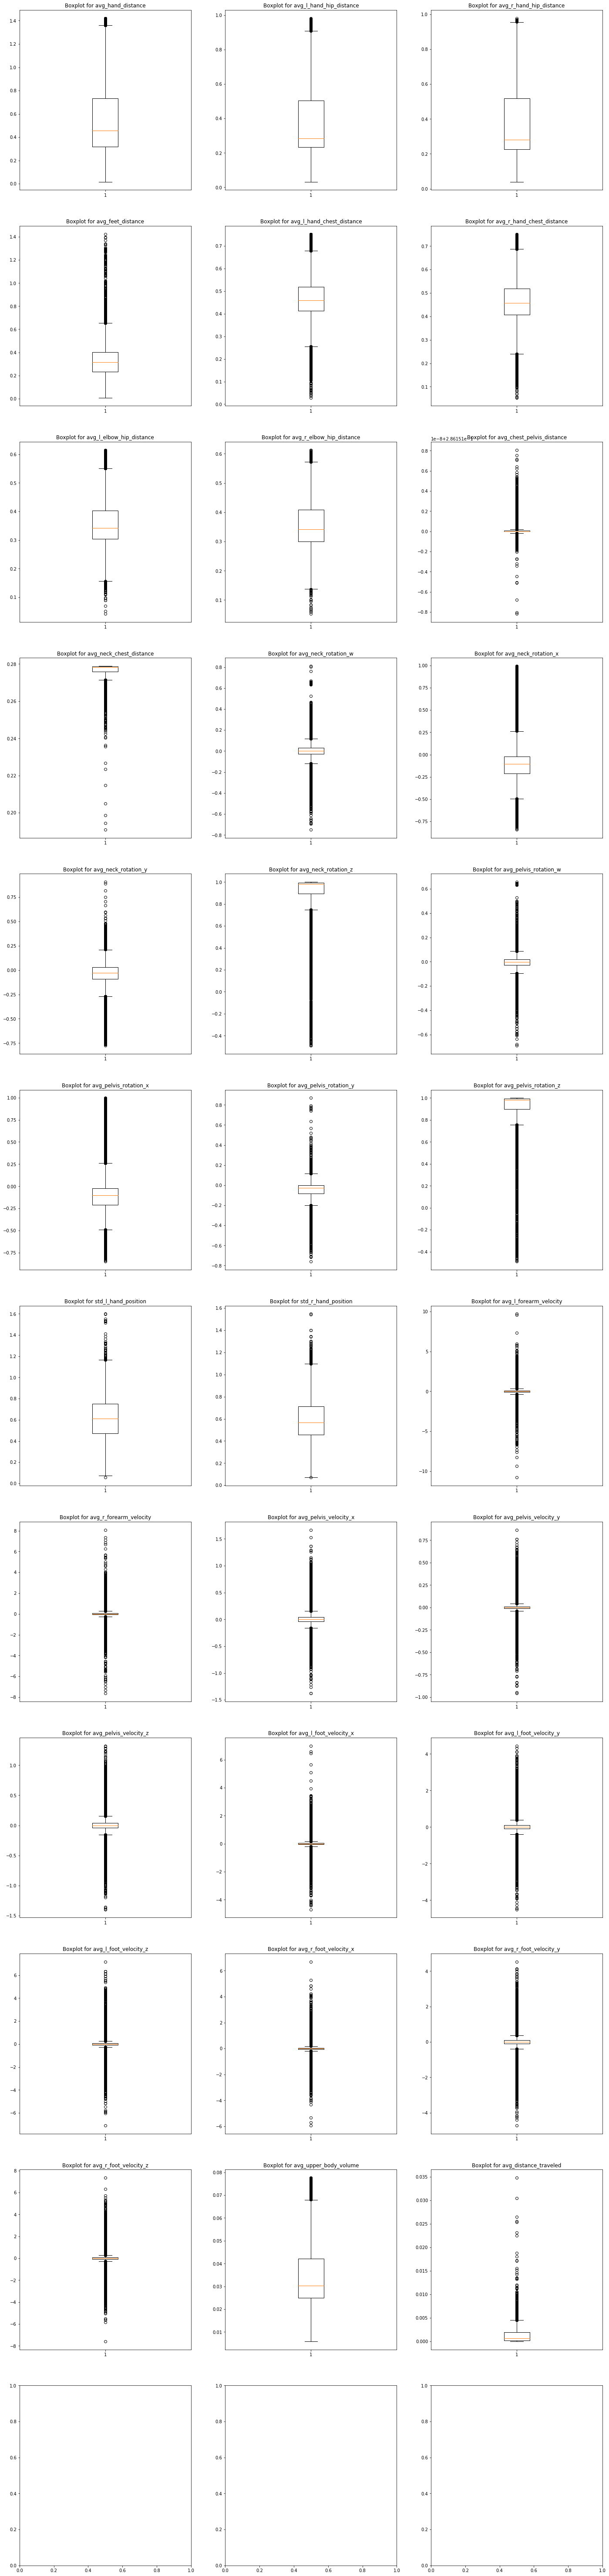

In [220]:
target = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)

numeric_vars = data.columns

rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [221]:
numeric_data = data

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,...,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,0.404018,0.369949,0.363975,0.230766,0.619217,0.601727,0.571411,0.559888,0.511190,0.972853,...,0.524815,0.514115,0.400755,0.505256,0.497651,0.470156,0.509430,0.507979,0.424873,0.039132
std,0.270746,0.234617,0.239075,0.115874,0.179396,0.178276,0.185524,0.185395,0.039517,0.047715,...,0.056495,0.073439,0.048517,0.077665,0.056915,0.046971,0.073253,0.056815,0.241197,0.052278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.213720,0.210563,0.197147,0.159057,0.532234,0.508054,0.458385,0.441195,0.501322,0.965480,...,0.520402,0.499807,0.396748,0.493151,0.492514,0.466034,0.499187,0.502841,0.266415,0.004886
50%,0.312869,0.263799,0.258250,0.216096,0.595545,0.579245,0.524807,0.516085,0.503056,0.993536,...,0.525681,0.513629,0.401367,0.503444,0.497174,0.469748,0.510133,0.507905,0.339296,0.019292
75%,0.510685,0.495347,0.508481,0.277872,0.678646,0.668065,0.630627,0.635726,0.507110,0.998246,...,0.531687,0.528651,0.405058,0.514984,0.502099,0.473570,0.519775,0.512649,0.506029,0.054903
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


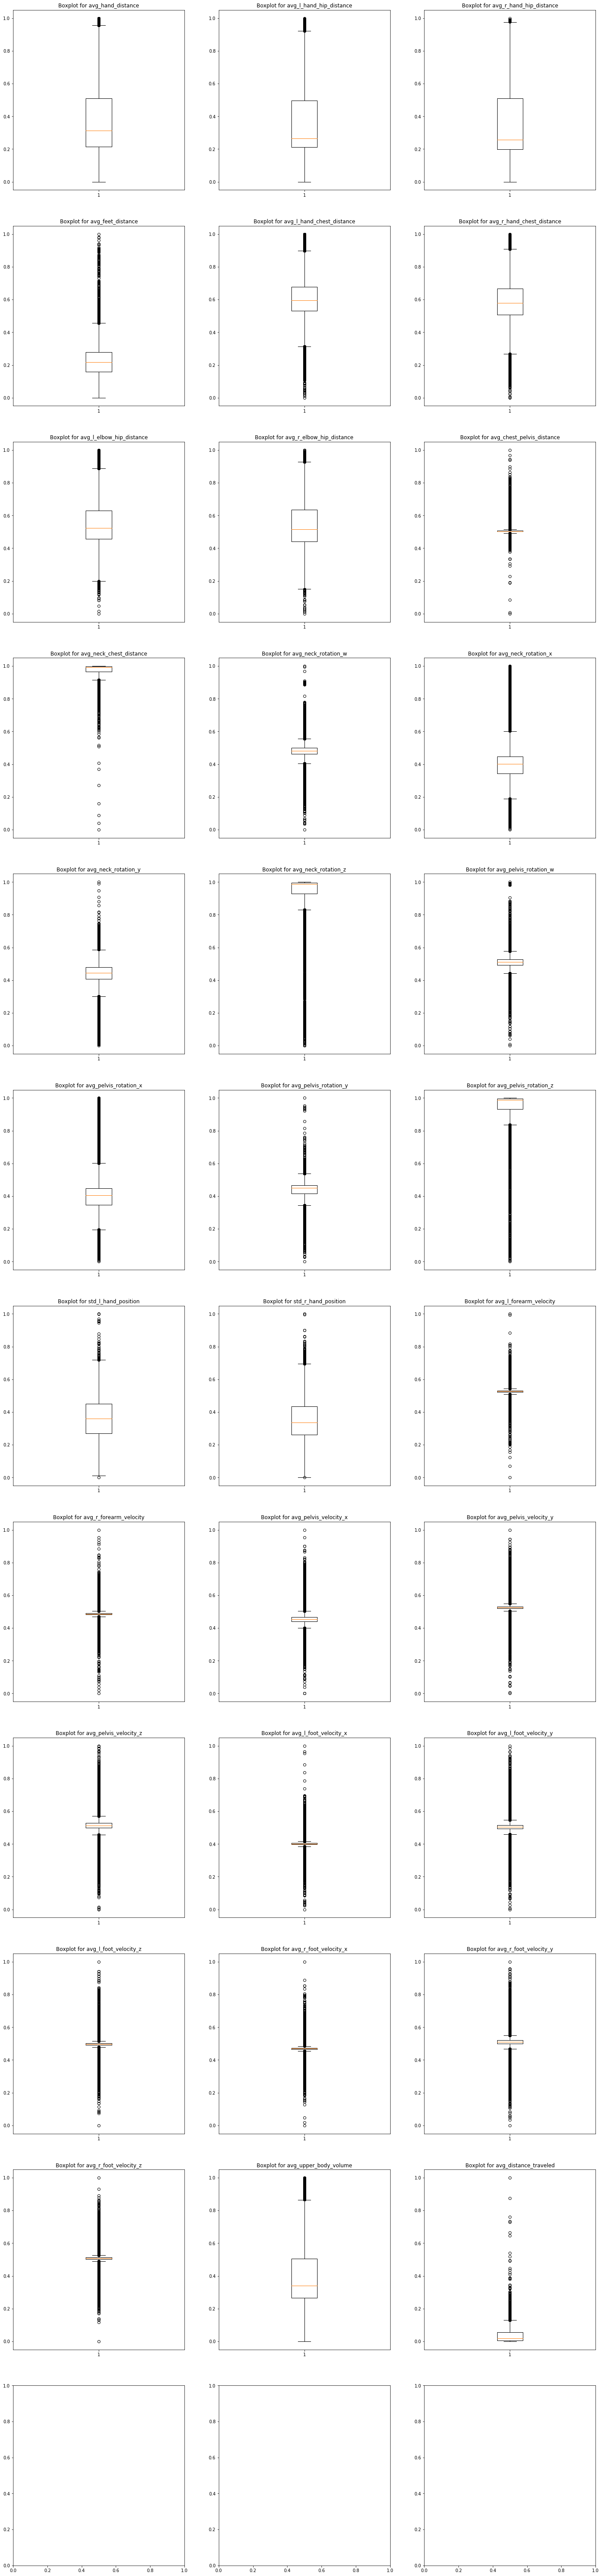

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
0,0.915126,0.815803,0.766160,0.118667,0.945933,0.890309,0.935687,0.885157,0.503023,0.996572,...,0.525591,0.513509,0.401603,0.502132,0.497046,0.469754,0.508442,0.507816,0.914895,0.001310
1,0.921423,0.813746,0.770117,0.125708,0.945568,0.894563,0.935456,0.890388,0.502723,0.994826,...,0.525659,0.517099,0.401739,0.504022,0.496582,0.470143,0.509417,0.507948,0.922889,0.002111
2,0.921853,0.818104,0.767690,0.125720,0.947426,0.893760,0.937567,0.889439,0.503003,0.994668,...,0.525592,0.515506,0.403019,0.503292,0.497447,0.470478,0.509798,0.508704,0.923266,0.001945
3,0.918518,0.817907,0.762935,0.126452,0.946526,0.890975,0.936481,0.886423,0.502678,0.994700,...,0.525597,0.515389,0.399252,0.503285,0.497606,0.469826,0.510550,0.507864,0.919871,0.001359
4,0.921153,0.811145,0.771422,0.122566,0.944462,0.894978,0.934240,0.890808,0.502934,0.994903,...,0.525445,0.517273,0.400116,0.502993,0.496629,0.469629,0.509824,0.507275,0.922580,0.001655


In [222]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [223]:
#Store MinMaxScaler

minMaxDataFull = minMaxData.join(target, how='right')
minMaxDataFull.to_csv(r'datasets/pad/Fs_B_N_DANCE_WALK_KIN.csv', index = False)

joblib.dump(transf, r'datasets/pad/scalers/Fs_B_DANCE_WALK_KIN.pkl') 

['datasets/pad/scalers/Fs_B_DANCE_WALK_KIN.pkl']

In [205]:
data = pd.read_csv('datasets/pad/Fs_N_DANCE_WALK.csv')
scaler = joblib.load(r'datasets/pad/scalers/Fs_DANCE_WALK.pkl') 

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A,EMOTION_D
0,0.988621,0.758556,0.777470,0.227834,0.924631,0.931621,0.912027,0.920359,0.262792,0.996951,...,0.619706,0.335797,0.448830,0.497462,0.538329,0.982666,0.000703,-0.5,0.6,0.9
1,0.988220,0.758022,0.776198,0.228134,0.924481,0.930913,0.911643,0.919500,0.262826,0.997039,...,0.619455,0.335751,0.448784,0.497425,0.538251,0.981634,0.000945,-0.5,0.6,0.9
2,0.988587,0.757353,0.778526,0.228080,0.924085,0.932122,0.911223,0.921358,0.262866,0.997260,...,0.620000,0.335905,0.448853,0.497603,0.538354,0.983064,0.001437,-0.5,0.6,0.9
3,0.988206,0.755571,0.779917,0.228841,0.923227,0.932326,0.910089,0.921681,0.262849,0.997531,...,0.619763,0.335741,0.448860,0.497484,0.538213,0.982519,0.001408,-0.5,0.6,0.9
4,0.989566,0.755998,0.783723,0.228295,0.923545,0.934681,0.910652,0.924313,0.262952,0.997887,...,0.619369,0.335707,0.448875,0.497253,0.537981,0.984512,0.001429,-0.5,0.6,0.9


## Data Standardization

In [264]:
data = pd.read_csv('datasets/pad/Fs_B_DANCE_WALK_KIN.csv')

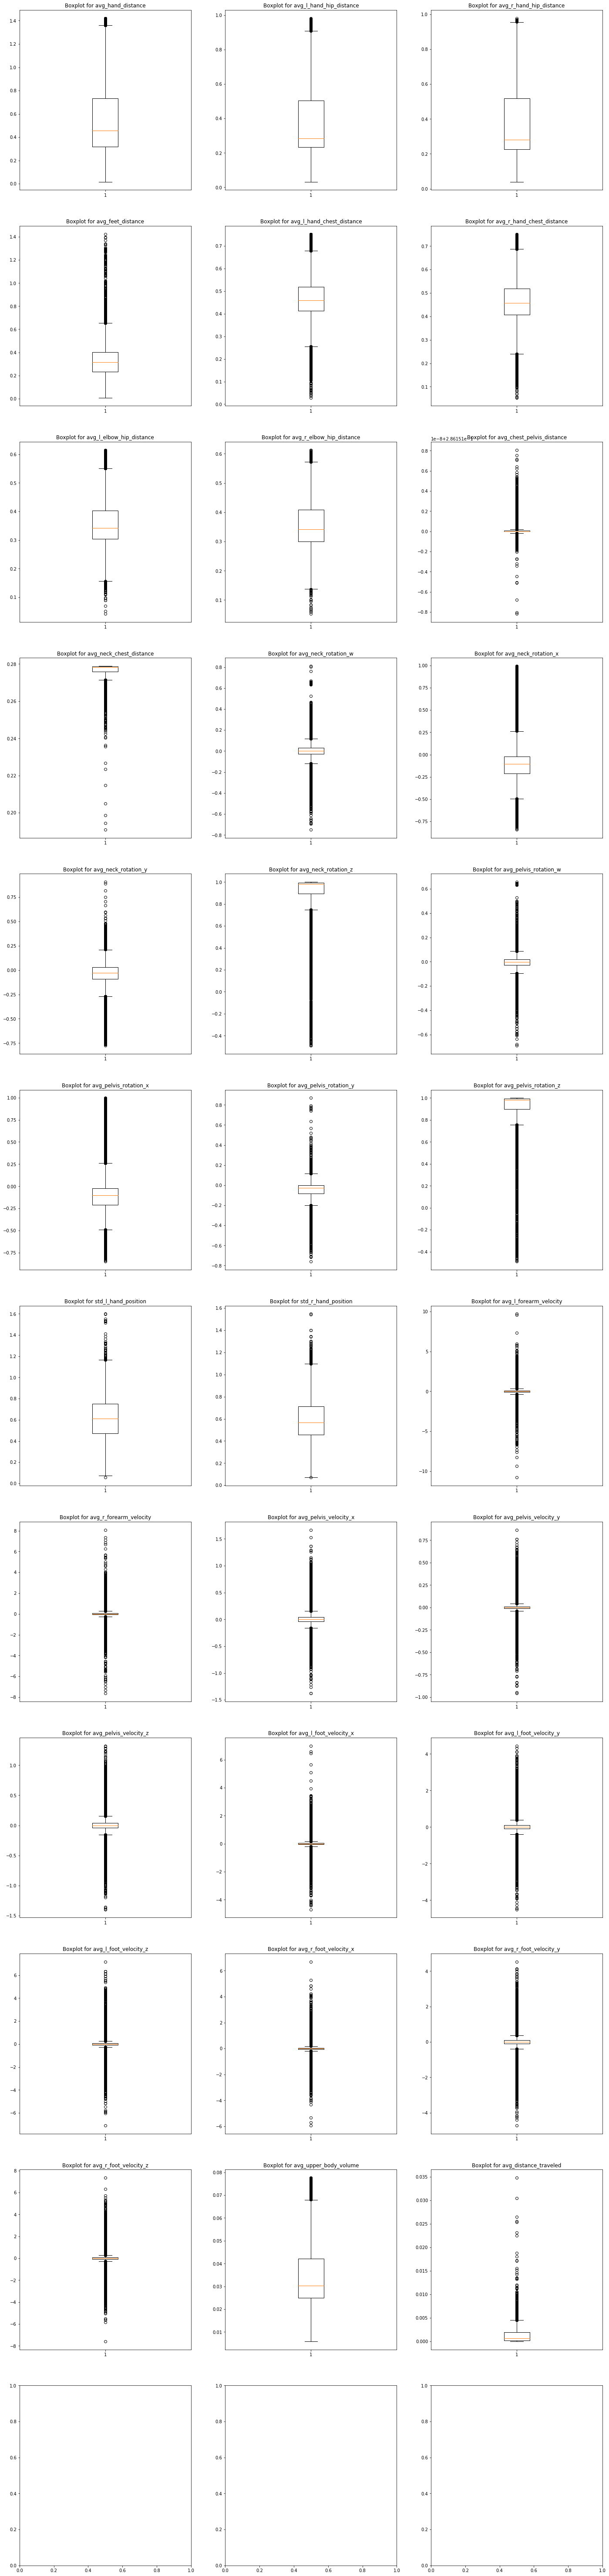

In [265]:
target = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)

numeric_vars = data.columns

rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [266]:
numeric_data = data

transf = StandardScaler(copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
count,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,...,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,13000.000000,1.300000e+04
mean,-1.399223e-16,1.880205e-16,1.617851e-16,1.694371e-16,-2.623542e-16,-1.989520e-16,4.809828e-17,2.404914e-16,-2.426998e-08,-4.774847e-15,...,7.651999e-18,-1.038486e-17,1.093143e-18,1.913000e-18,7.651999e-18,-1.557728e-17,-9.838284e-18,-4.372571e-18,0.000000,-4.372571e-18
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,...,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038,1.000038e+00
min,-1.492299e+00,-1.576883e+00,-1.522492e+00,-1.991601e+00,-3.451816e+00,-3.375378e+00,-3.080107e+00,-3.020089e+00,-1.293653e+01,-2.038964e+01,...,-9.290024e+00,-7.000802e+00,-8.260469e+00,-6.505799e+00,-8.744153e+00,-1.000997e+01,-6.954668e+00,-8.941245e+00,-1.761589,-7.485569e-01
25%,-7.028948e-01,-6.793733e-01,-6.978358e-01,-6.188756e-01,-4.848881e-01,-5.254537e-01,-6.092494e-01,-6.402393e-01,-2.497210e-01,-1.545201e-01,...,-7.812501e-02,-1.948325e-01,-8.258248e-02,-1.558649e-01,-9.026333e-02,-8.776054e-02,-1.398335e-01,-9.044334e-02,-0.656993,-6.550859e-01
50%,-3.366728e-01,-4.524603e-01,-4.422442e-01,-1.266100e-01,-1.319626e-01,-1.261115e-01,-2.512121e-01,-2.362755e-01,-2.058484e-01,4.334938e-01,...,1.533084e-02,-6.618825e-03,1.261530e-02,-2.333302e-02,-8.384700e-03,-8.687893e-03,9.592539e-03,-1.305357e-03,-0.354815,-3.795203e-01
75%,3.939903e-01,5.344972e-01,6.044597e-01,4.065383e-01,3.312805e-01,3.721222e-01,3.191930e-01,4.090776e-01,-1.032655e-01,5.322182e-01,...,1.216439e-01,1.979409e-01,8.870619e-02,1.252586e-01,7.815440e-02,7.268646e-02,1.412347e-01,8.219336e-02,0.336484,3.016918e-01
max,2.201346e+00,2.685546e+00,2.660462e+00,6.638781e+00,2.122665e+00,2.234109e+00,2.310245e+00,2.374009e+00,1.237016e+01,5.689703e-01,...,8.411489e+00,6.616389e+00,1.235182e+01,6.370448e+00,8.826705e+00,1.128080e+01,6.697193e+00,8.660353e+00,2.384563,1.838066e+01


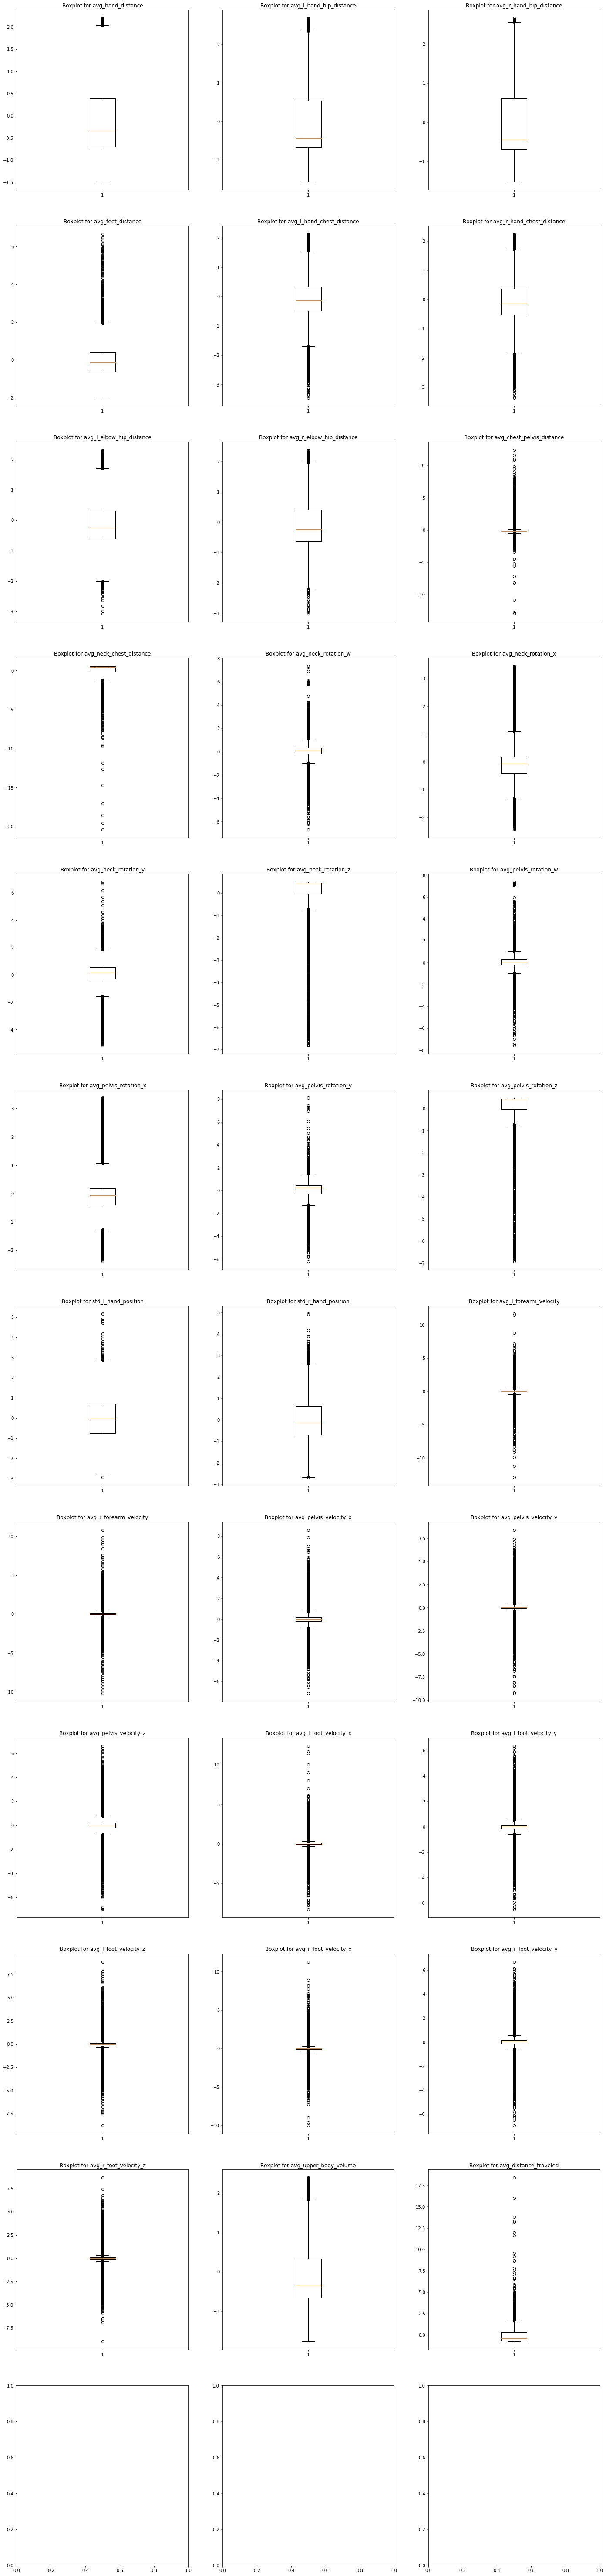

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
0,1.887853,1.900419,1.682319,-0.967460,1.821272,1.618796,1.963577,1.754536,-0.206682,0.497118,...,0.013728,-0.008253,0.017482,-0.040223,-0.010629,-0.008541,-0.013492,-0.002865,2.031703,-0.723500
1,1.911111,1.891649,1.698874,-0.906689,1.819234,1.642663,1.962327,1.782754,-0.214266,0.460525,...,0.014942,0.040632,0.020282,-0.015881,-0.018780,-0.000273,-0.000177,-0.000554,2.064848,-0.708180
2,1.912700,1.910228,1.688720,-0.906586,1.829590,1.638158,1.973707,1.777634,-0.207199,0.457228,...,0.013753,0.018941,0.046684,-0.025285,-0.003580,0.006869,0.005030,0.012765,2.066412,-0.711345
3,1.900379,1.909388,1.668832,-0.900272,1.824575,1.622534,1.967856,1.761365,-0.215413,0.457888,...,0.013836,0.017342,-0.030970,-0.025377,-0.000790,-0.007024,0.015291,-0.002019,2.052338,-0.722557
4,1.910114,1.880566,1.704329,-0.933808,1.813071,1.644992,1.955776,1.785017,-0.208933,0.462144,...,0.011148,0.042999,-0.013160,-0.029141,-0.017958,-0.011219,0.005376,-0.012396,2.063569,-0.716892


In [267]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [268]:
#Store MinMaxScaler

minMaxDataFull = minMaxData.join(target, how='right')
minMaxDataFull.to_csv(r'datasets/pad/Fs_B_S_DANCE_WALK_KIN.csv', index = False)

joblib.dump(transf, r'datasets/pad/scalers/standardizers/Fs_B_DANCE_WALK_KIN.pkl') 

['datasets/pad/scalers/standardizers/Fs_B_DANCE_WALK_KIN.pkl']

In [247]:
data = pd.read_csv('datasets/pad/Fs_S_DANCE_WALK.csv')
scaler = joblib.load(r'datasets/pad/scalers/standardizers/Fs_DANCE_WALK.pkl') 

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A,EMOTION_D
0,2.166186,1.469227,1.565114,-0.170360,1.704333,1.817640,1.765270,1.893607,-0.406914,0.739024,...,0.004893,0.001381,-0.005517,0.020041,0.005400,2.378336,-1.061043,-0.5,0.6,0.9
1,2.164692,1.467020,1.559826,-0.167932,1.703526,1.813916,1.763318,1.889234,-0.405955,0.740899,...,-0.001132,0.000162,-0.007198,0.018654,0.003574,2.373948,-1.056402,-0.5,0.6,0.9
2,2.166058,1.464260,1.569503,-0.168363,1.701394,1.820273,1.761181,1.898689,-0.404833,0.745585,...,0.011960,0.004315,-0.004657,0.025272,0.005973,2.380031,-1.046974,-0.5,0.6,0.9
3,2.164640,1.456900,1.575284,-0.162206,1.696784,1.821346,1.755415,1.900334,-0.405304,0.751336,...,0.006256,-0.000124,-0.004429,0.020843,0.002674,2.377713,-1.047535,-0.5,0.6,0.9
4,2.169707,1.458665,1.591108,-0.166626,1.698494,1.833728,1.758277,1.913724,-0.402446,0.758901,...,-0.003195,-0.001037,-0.003869,0.012240,-0.002765,2.386191,-1.047133,-0.5,0.6,0.9
